In [2]:
import math
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#the SIR model (susceptible, infectious, recovered) is a system of differential equations that models disease spread
#for the spatially dependent version, we have ds/dt = (susceptible diffusion constant)*(laplacian)S - BIS/N
#dI/dt = (infection diffusion constant)*(laplacian)I +BIS/N

def display_distribution(target_time, beta, gamma, susceptible_coefficient, infected_coefficient, initial_susceptible, initial_infected):
  delta_t = 1/(4*np.amin((susceptible_coefficient, infected_coefficient))) #calculate our time intervals to be numerically stable
  num_steps = int(target_time/delta_t) #number of time steps

  susceptible = np.zeros((100, 100, num_steps))
  infected = np.zeros((100, 100, num_steps))
  population = 100000      #initial conditions
  
  for i in range(100):  #set up the grid with initial conditions
    for j in range(100):
      if i != 0 and i != 99 and j != 0 and j != 99:
        susceptible[i][j][0] = initial_susceptible(i+0.5, j+0.5)
        infected[i][j][0] = initial_infected(i+0.5, j+0.5)

  
  for k in range(num_steps-1):
    for i in range(1, 99):  
      for j in range(1, 99):   #dynamically update density numbers using the PDE
        susceptible[i][j][k+1] = -(beta*infected[i][j][k]*susceptible[i][j][k]/population) + susceptible_coefficient*(delta_t) * (susceptible[i+1][j][k] + susceptible[i-1][j][k] + susceptible[i][j+1][k] + susceptible[i][j-1][k] - 4*susceptible[i][j][k]) + susceptible[i][j][k]
        infected[i][j][k+1] = (beta*infected[i][j][k]*susceptible[i][j][k]/population) + infected_coefficient*(delta_t) * (infected[i+1][j][k] + infected[i-1][j][k] + infected[i][j+1][k] + infected[i][j-1][k] - 4*infected[i][j][k]) + infected[i][j][k] - gamma*infected[i][j][k]
  
  #display the infection density over time
  for k in range(num_steps): 
    plt.title(f"Infection density at t = {k*delta_t:.3f} days")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.xlim([0, 100])
    plt.ylim([0, 100])

    plt.pcolormesh(infected[:, :, k], cmap=plt.cm.jet, vmin=0, vmax=10000)
    plt.colorbar()
    plt.show()
  

  return susceptible, infected



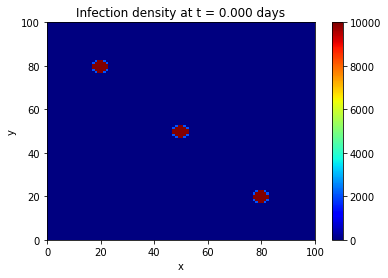

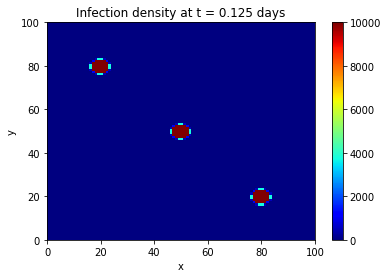

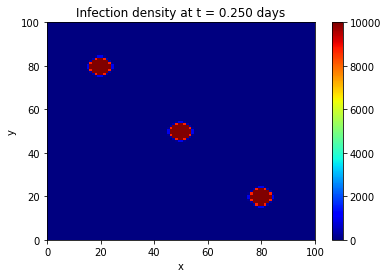

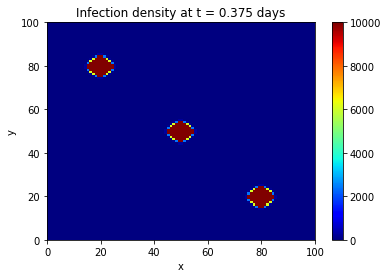

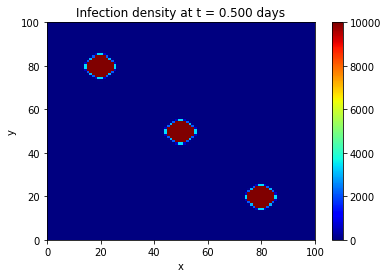

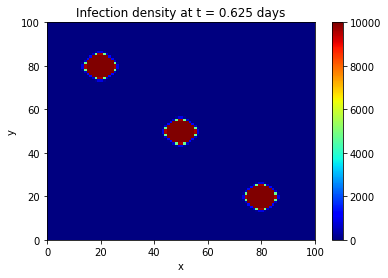

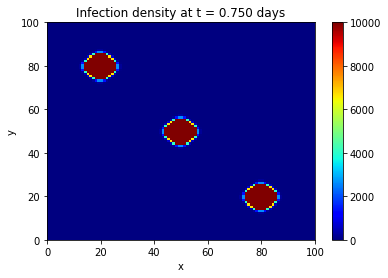

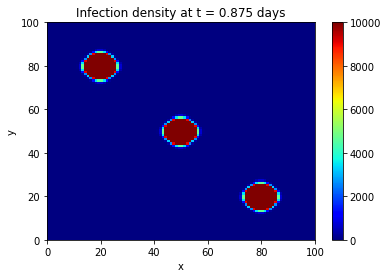

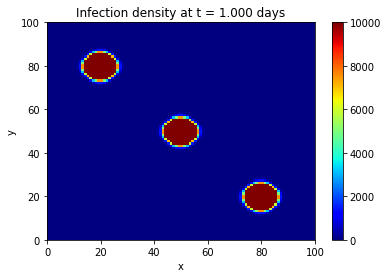

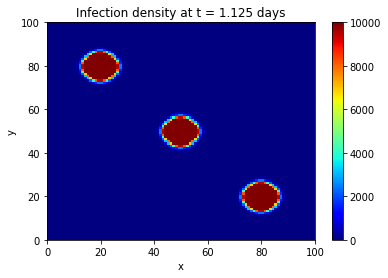

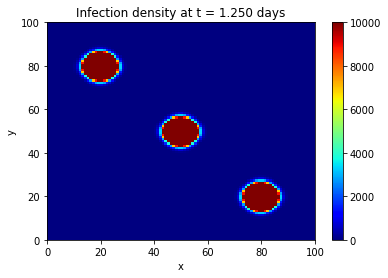

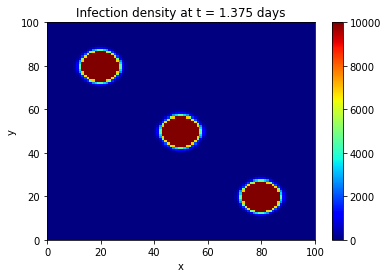

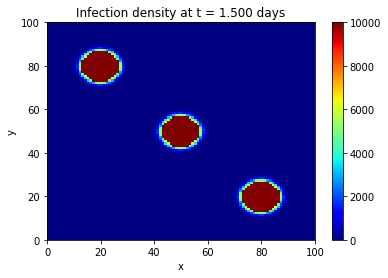

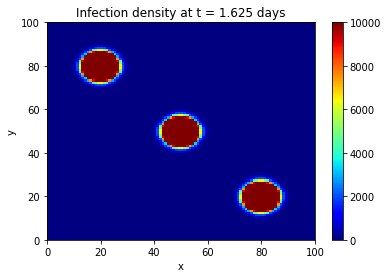

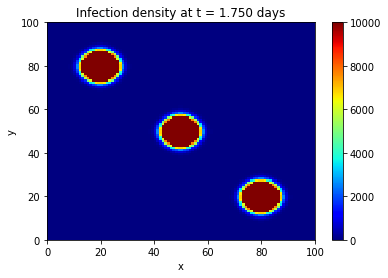

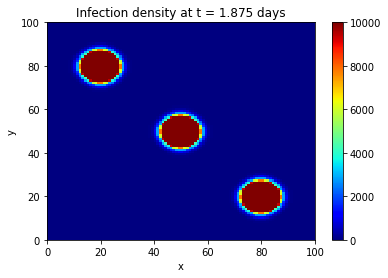

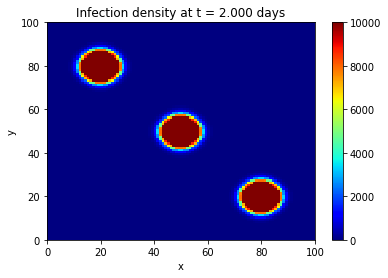

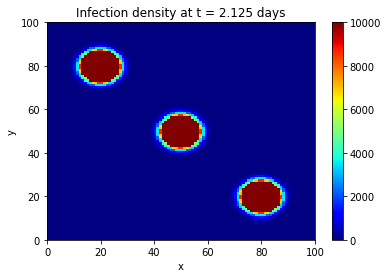

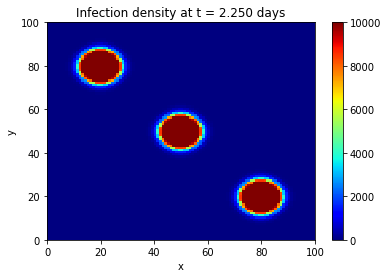

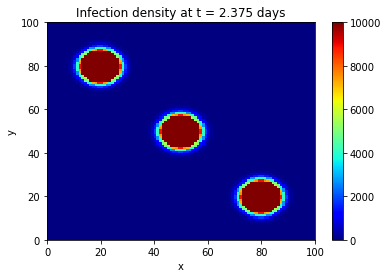

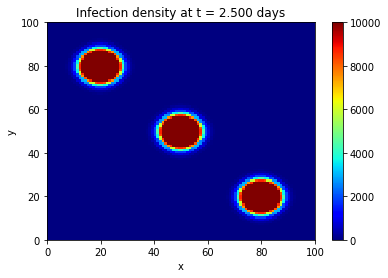

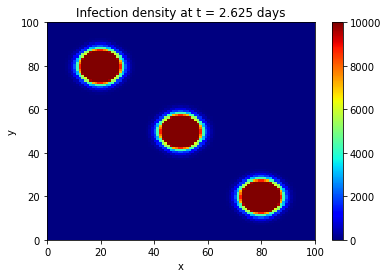

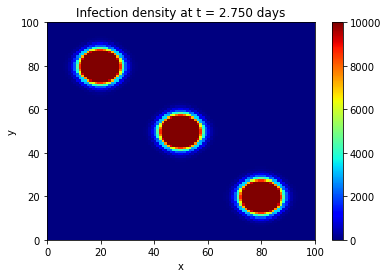

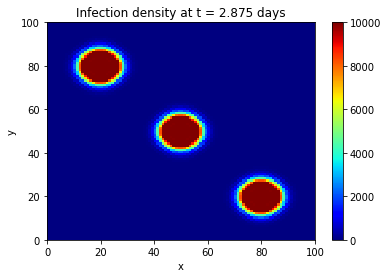

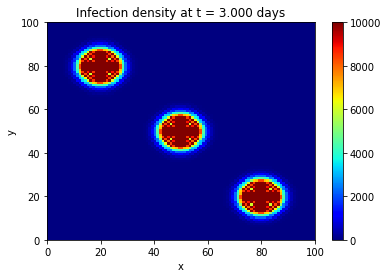

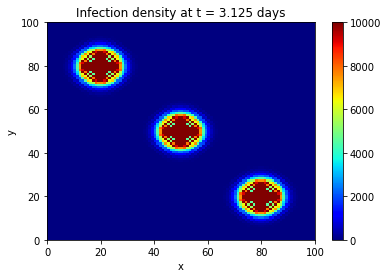

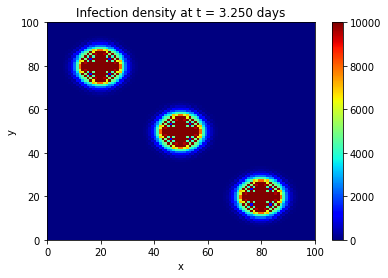

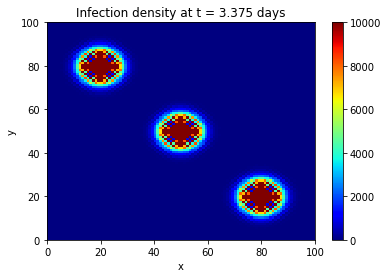

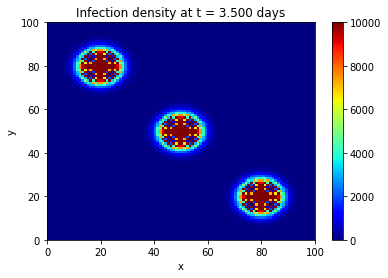

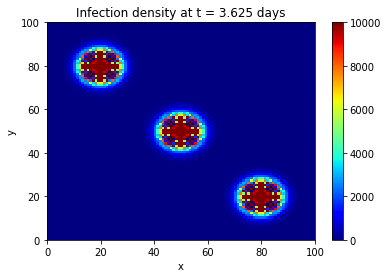

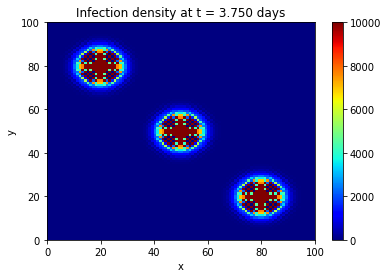

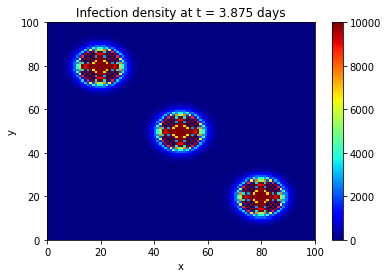

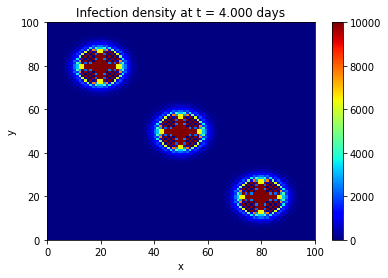

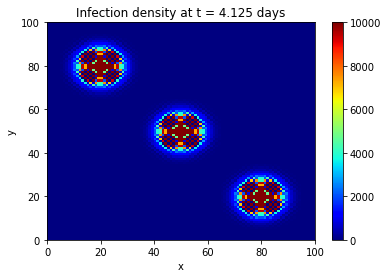

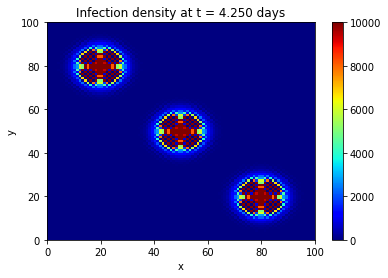

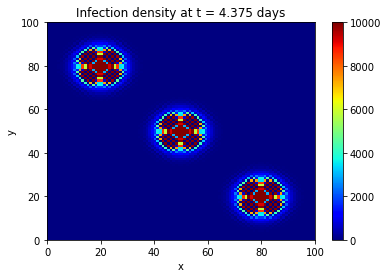

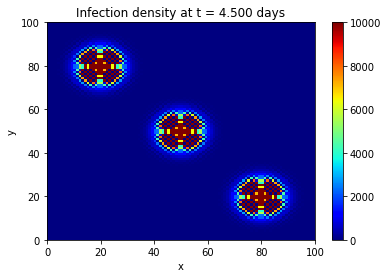

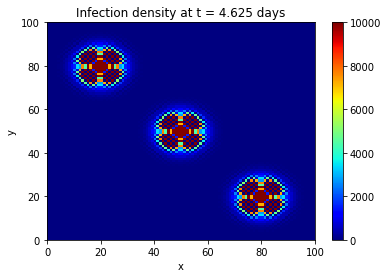

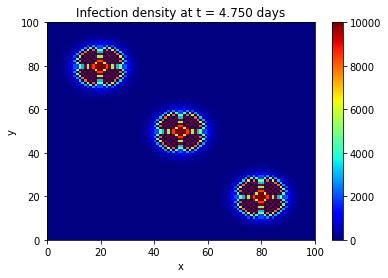

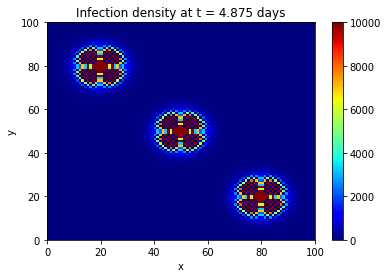

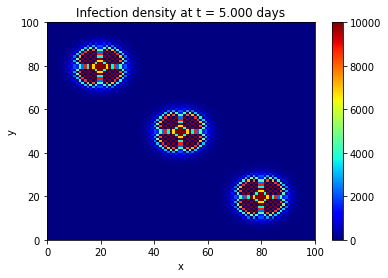

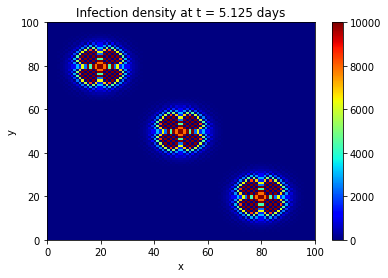

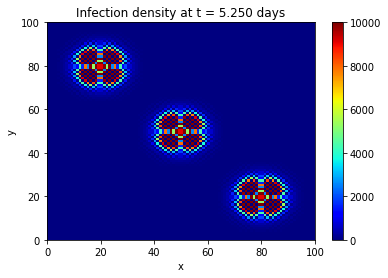

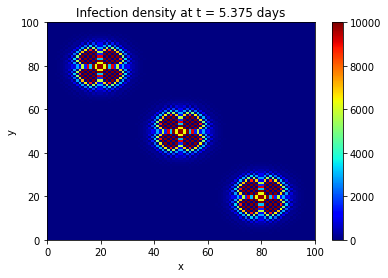

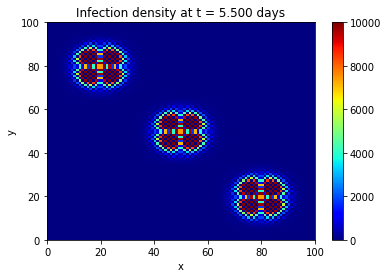

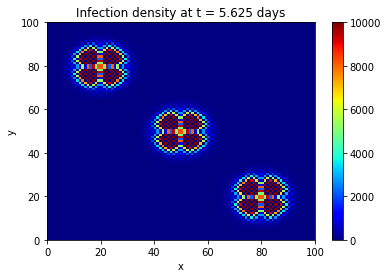

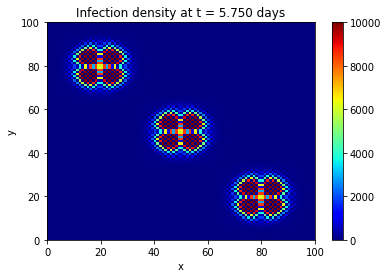

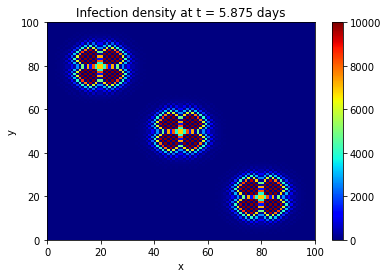

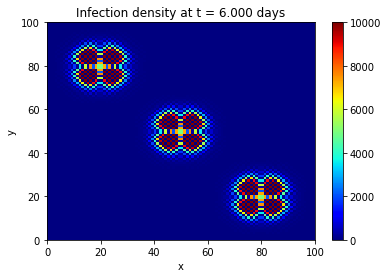

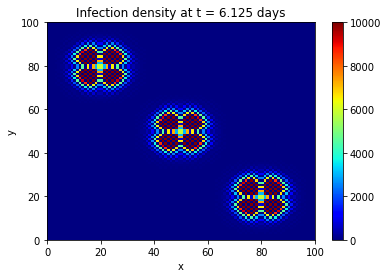

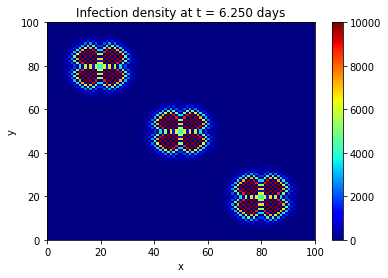

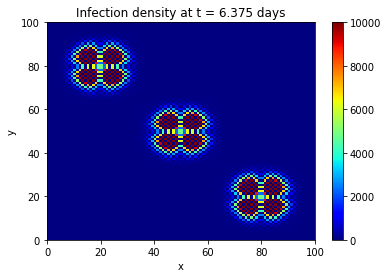

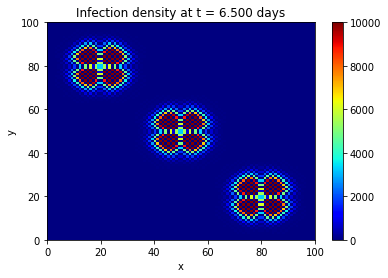

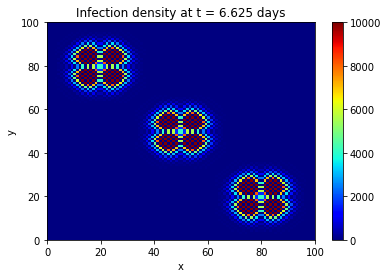

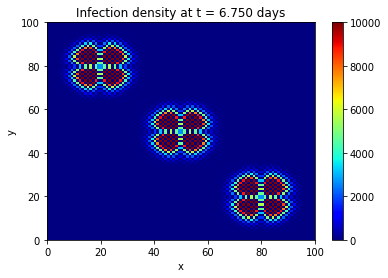

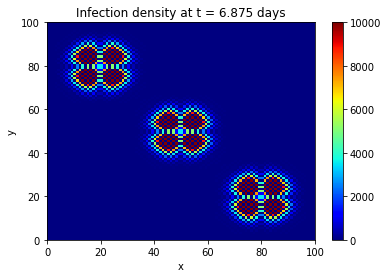

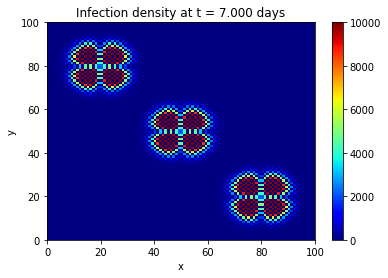

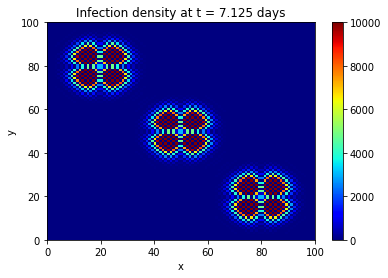

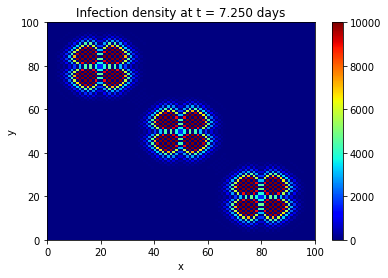

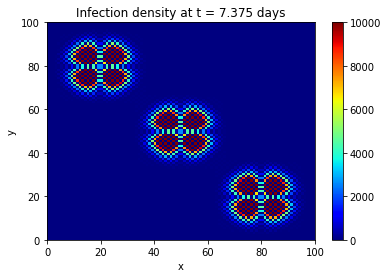

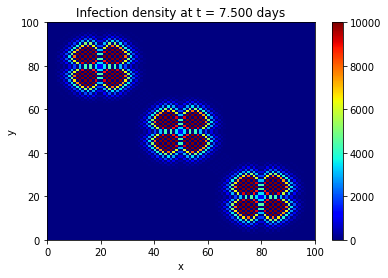

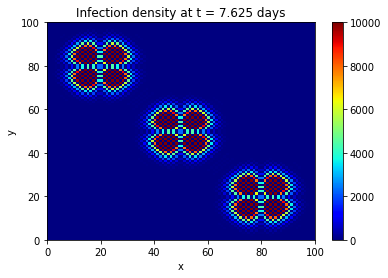

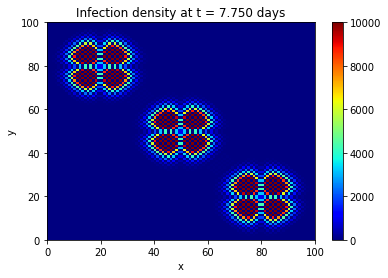

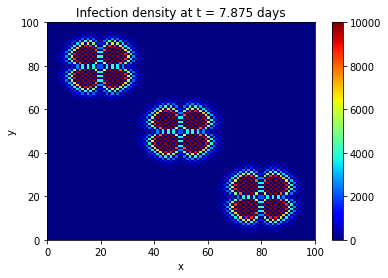

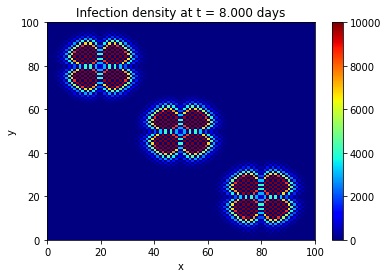

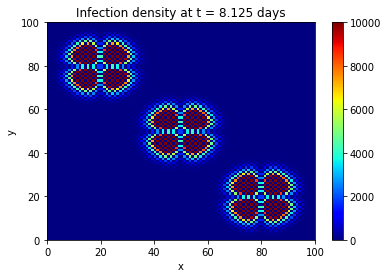

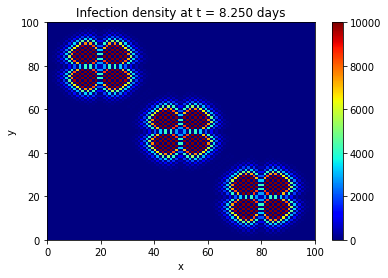

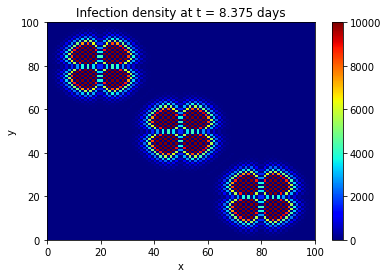

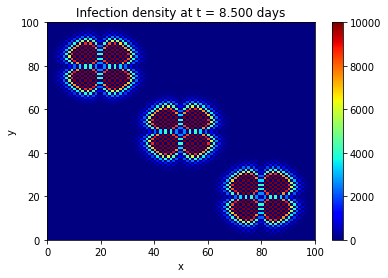

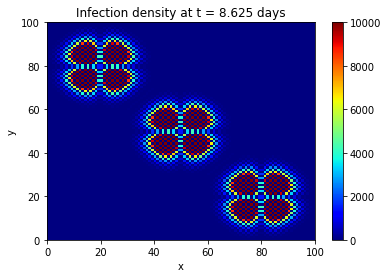

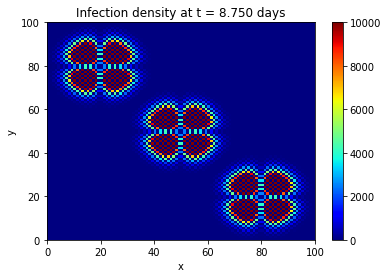

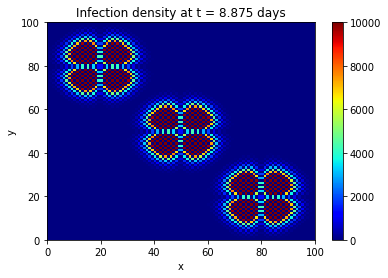

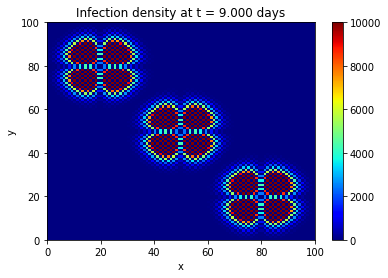

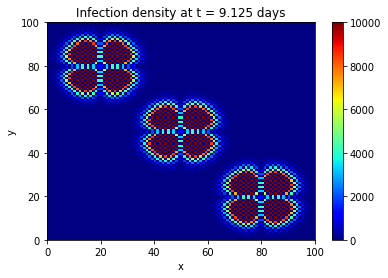

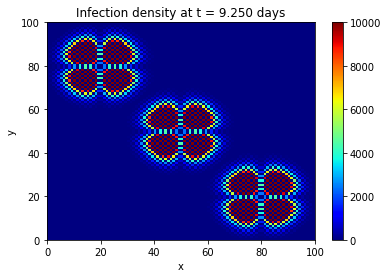

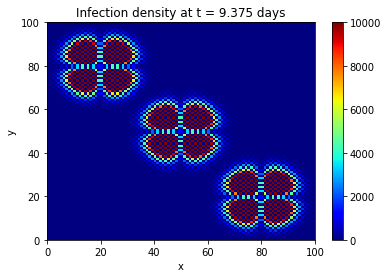

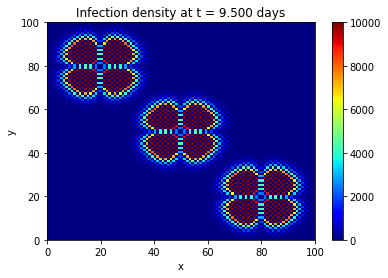

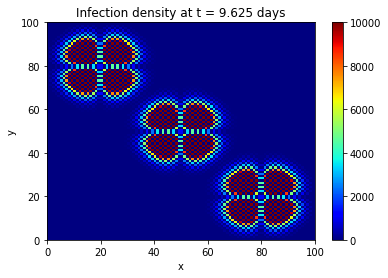

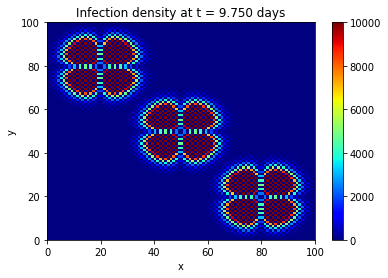

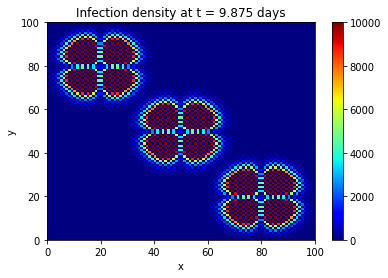

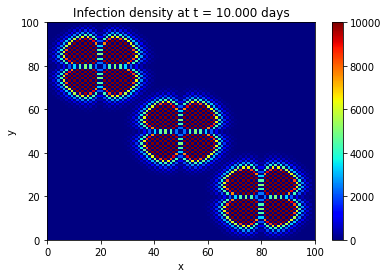

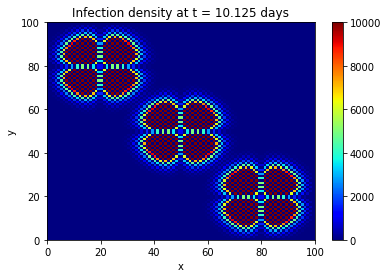

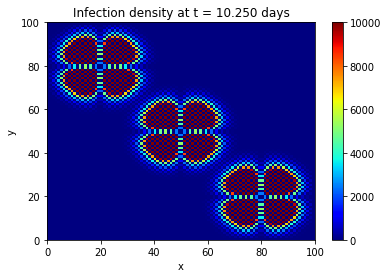

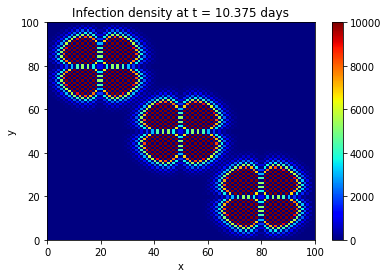

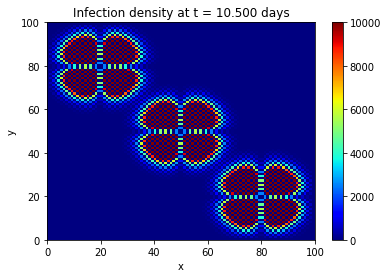

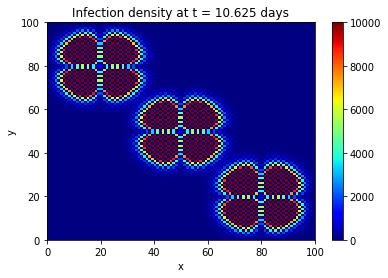

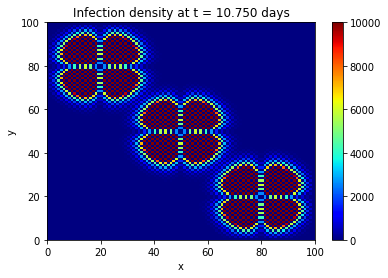

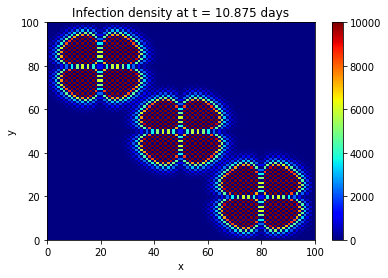

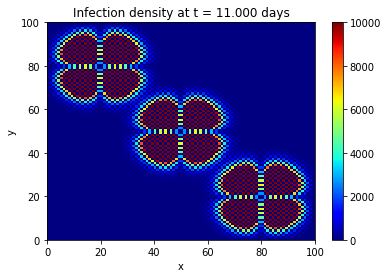

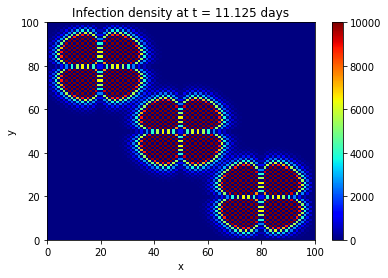

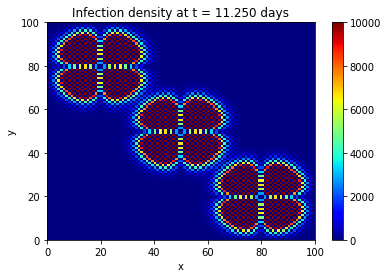

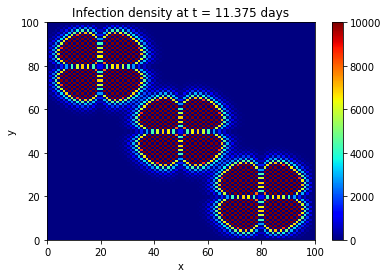

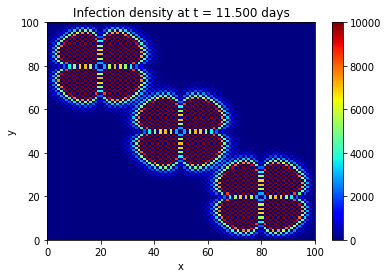

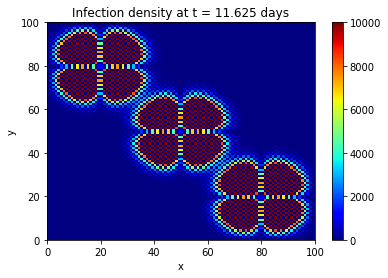

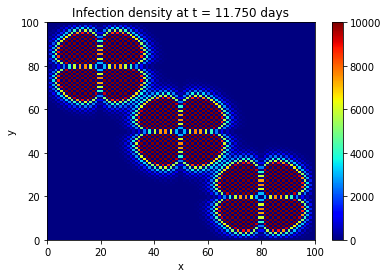

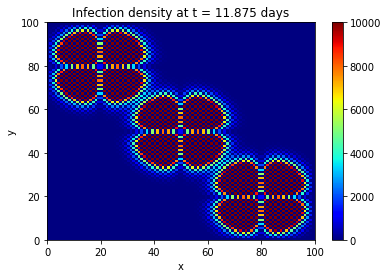

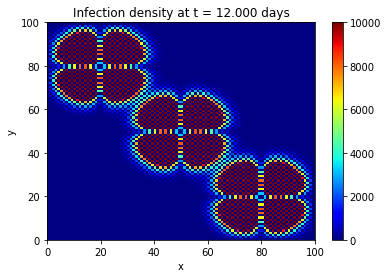

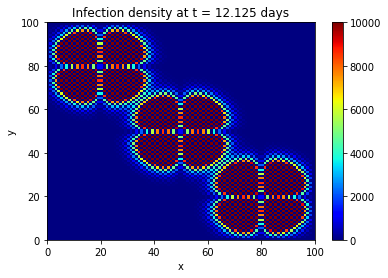

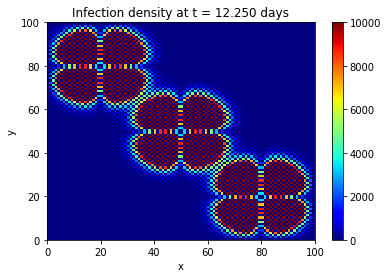

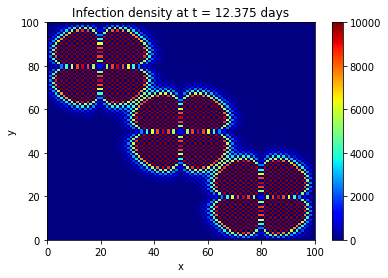

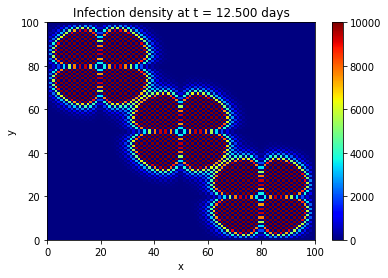

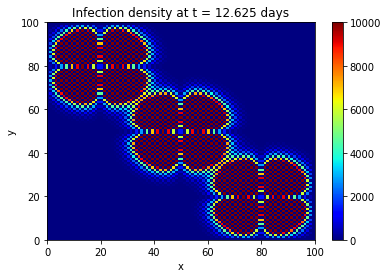

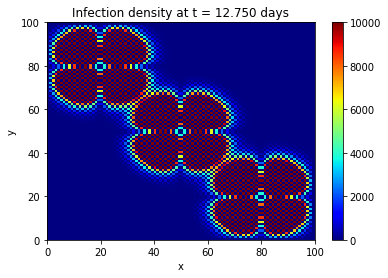

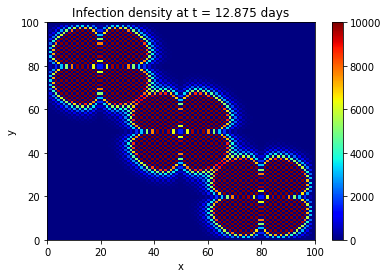

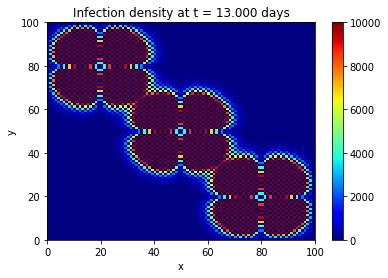

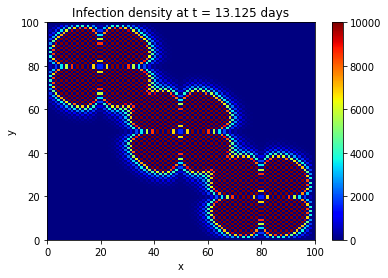

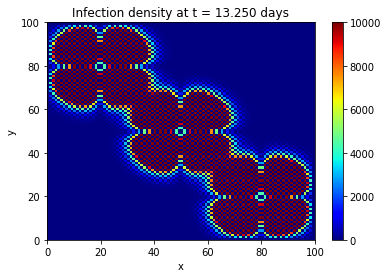

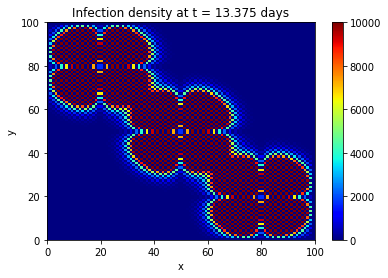

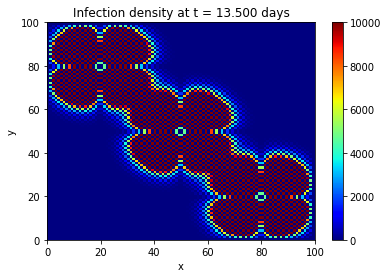

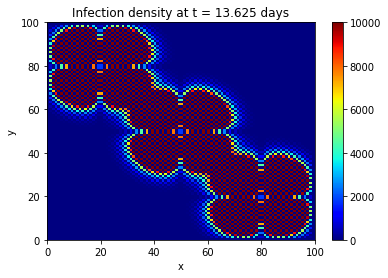

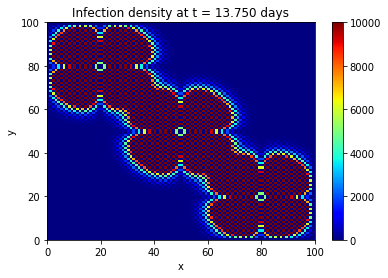

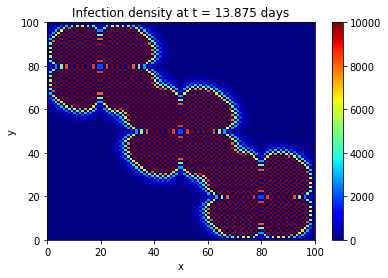

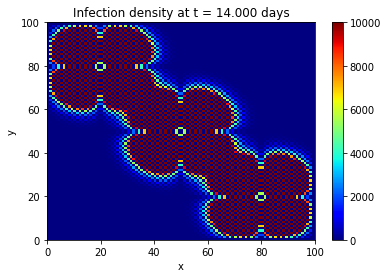

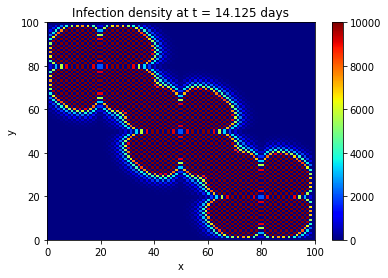

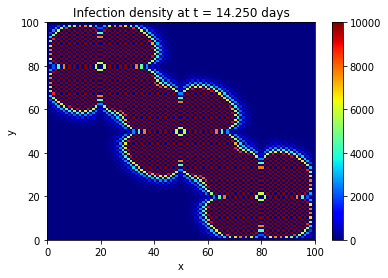

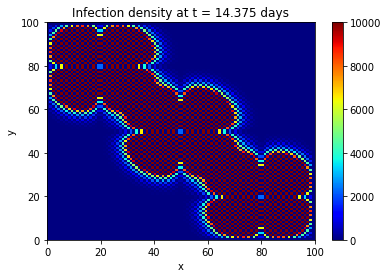

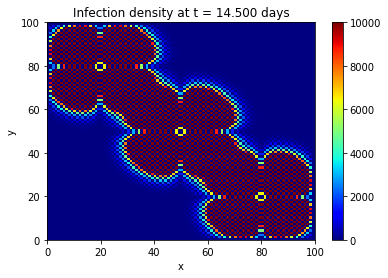

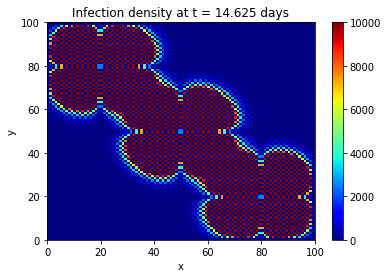

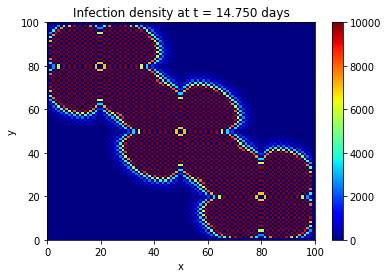

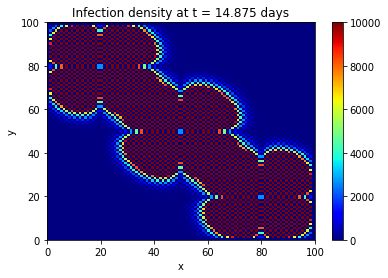

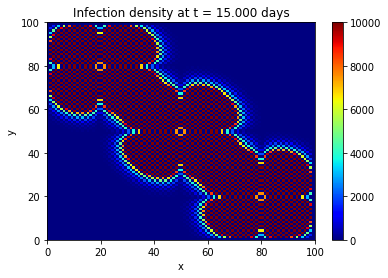

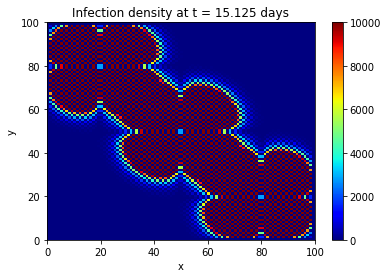

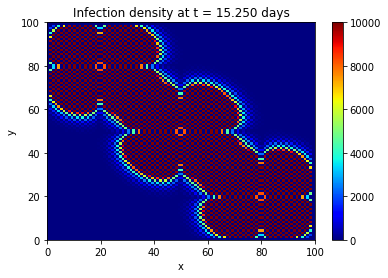

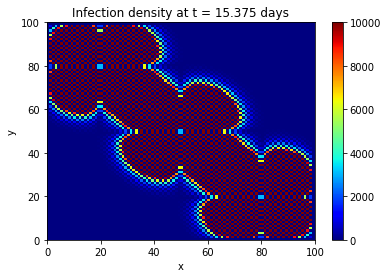

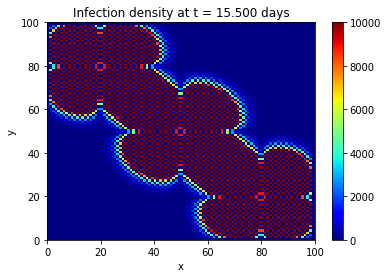

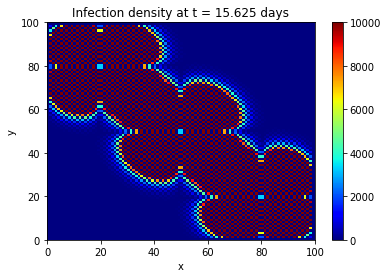

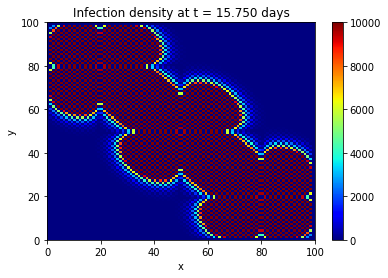

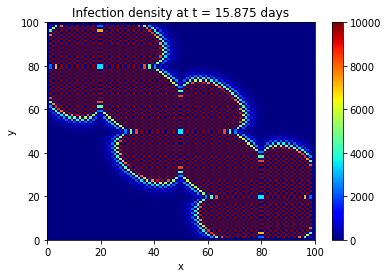

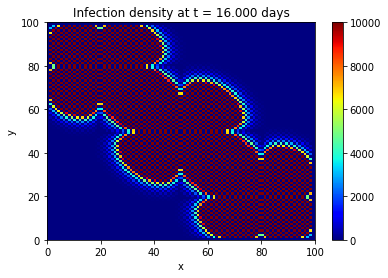

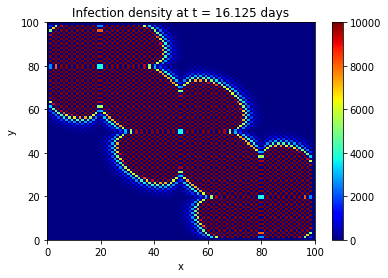

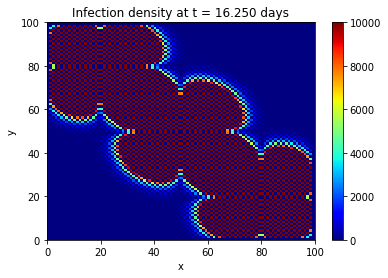

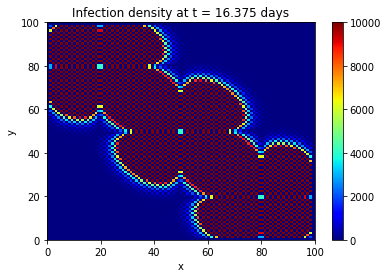

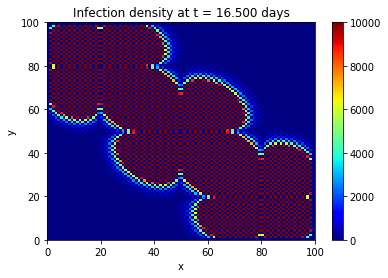

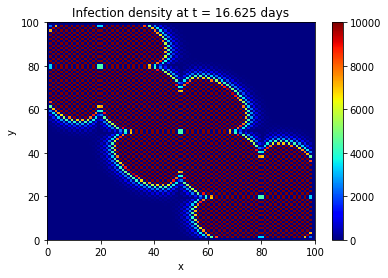

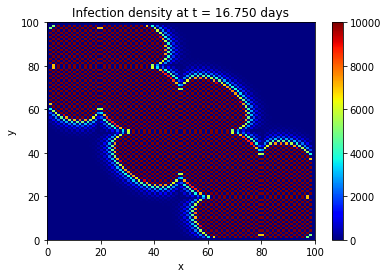

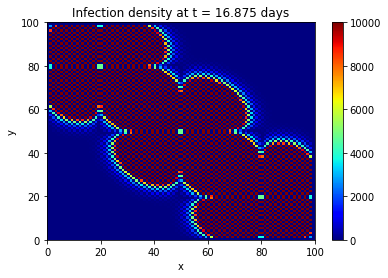

In [5]:
#initial distribution of three exponential peaks
def initial_infected(x, y):
  return 10000000*math.exp(-((x-50)**2) -((y-50)**2))+10000000*math.exp(-((x-80)**2) -((y-20)**2))+10000000*math.exp(-((x-20)**2) -((y-80)**2))
def initial_susceptible(x, y):
  return 10
x, y = display_distribution(17, 0.21, 0.07, 2, 2, initial_susceptible, initial_infected)
